In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/content/train.csv.zip')
print(data.shape)

(42000, 785)


In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

print(X_train.shape)
print(Y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

(784, 41000)
(41000,)


In [ ]:
Y_train

array([3, 3, 2, ..., 3, 3, 0])

In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2



In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[9 9 5 ... 7 9 1] [3 3 2 ... 3 3 0]
0.10634146341463414
Iteration:  10
[9 9 2 ... 7 2 6] [3 3 2 ... 3 3 0]
0.21921951219512195
Iteration:  20
[9 9 2 ... 7 2 6] [3 3 2 ... 3 3 0]
0.2936341463414634
Iteration:  30
[9 3 2 ... 7 2 0] [3 3 2 ... 3 3 0]
0.3402439024390244
Iteration:  40
[9 3 2 ... 7 2 0] [3 3 2 ... 3 3 0]
0.3904878048780488
Iteration:  50
[3 3 2 ... 7 2 0] [3 3 2 ... 3 3 0]
0.4394878048780488
Iteration:  60
[3 3 2 ... 3 2 0] [3 3 2 ... 3 3 0]
0.4832439024390244
Iteration:  70
[3 3 2 ... 3 8 0] [3 3 2 ... 3 3 0]
0.521609756097561
Iteration:  80
[3 3 2 ... 3 8 0] [3 3 2 ... 3 3 0]
0.5550975609756098
Iteration:  90
[3 3 2 ... 3 8 0] [3 3 2 ... 3 3 0]
0.5873414634146341
Iteration:  100
[3 7 2 ... 3 8 0] [3 3 2 ... 3 3 0]
0.6129512195121951
Iteration:  110
[3 7 2 ... 3 8 0] [3 3 2 ... 3 3 0]
0.6331463414634146
Iteration:  120
[3 7 2 ... 3 8 0] [3 3 2 ... 3 3 0]
0.6529268292682927
Iteration:  130
[3 7 2 ... 3 8 0] [3 3 2 ... 3 3 0]
0.669829268292683
Iteration:  140
[

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[1 8 1 ... 1 5 1] [3 3 2 ... 3 3 0]
0.12865853658536586
Iteration:  10
[3 8 4 ... 0 5 4] [3 3 2 ... 3 3 0]
0.24992682926829268
Iteration:  20
[3 8 4 ... 0 5 4] [3 3 2 ... 3 3 0]
0.3585609756097561
Iteration:  30
[3 3 4 ... 0 5 4] [3 3 2 ... 3 3 0]
0.4594878048780488
Iteration:  40
[3 3 8 ... 0 5 0] [3 3 2 ... 3 3 0]
0.5186341463414634
Iteration:  50
[3 3 8 ... 3 5 0] [3 3 2 ... 3 3 0]
0.5571463414634147
Iteration:  60
[3 3 8 ... 3 5 0] [3 3 2 ... 3 3 0]
0.5878780487804878
Iteration:  70
[3 3 8 ... 3 5 0] [3 3 2 ... 3 3 0]
0.6146341463414634
Iteration:  80
[3 3 2 ... 3 5 5] [3 3 2 ... 3 3 0]
0.6385609756097561
Iteration:  90
[3 3 2 ... 3 5 5] [3 3 2 ... 3 3 0]
0.6589756097560976
Iteration:  100
[3 3 2 ... 3 5 5] [3 3 2 ... 3 3 0]
0.6780243902439025
Iteration:  110
[3 3 2 ... 3 5 5] [3 3 2 ... 3 3 0]
0.6948048780487804
Iteration:  120
[3 3 2 ... 3 5 5] [3 3 2 ... 3 3 0]
0.708390243902439
Iteration:  130
[3 3 2 ... 3 5 5] [3 3 2 ... 3 3 0]
0.7217317073170731
Iteration:  140


In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


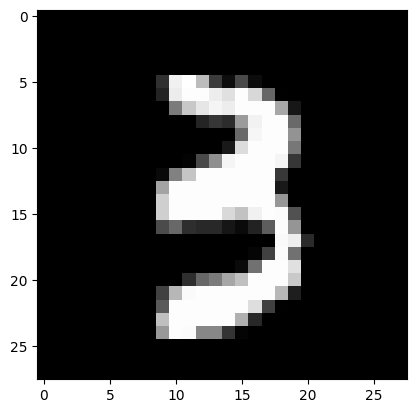

Prediction:  [3]
Label:  3


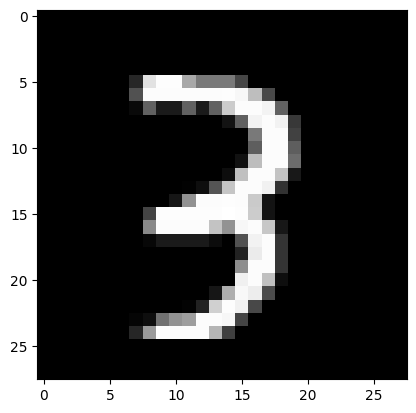

Prediction:  [2]
Label:  2


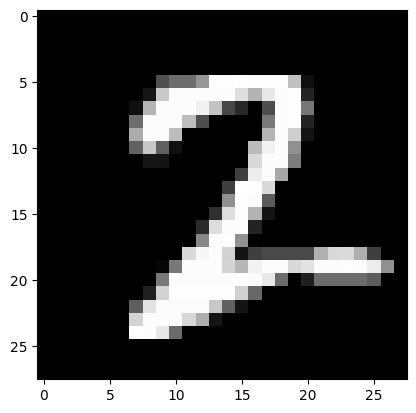

Prediction:  [2]
Label:  2


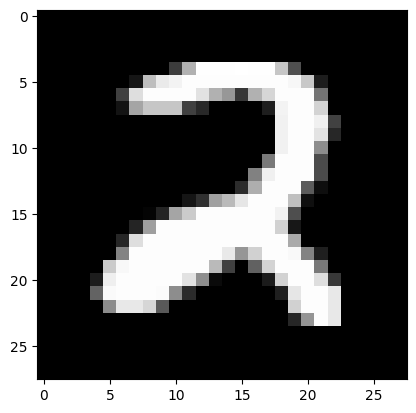

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[4 3 0 0 0 9 0 3 7 4 5 1 2 6 3 9 7 8 4 3 9 1 5 8 7 2 6 1 4 8 9 7 8 3 3 7 8
 8 9 6 5 9 3 0 4 7 1 5 0 0 3 7 7 9 1 1 1 8 9 6 7 2 3 0 3 0 2 8 9 9 9 2 9 8
 8 6 0 4 6 0 5 1 2 1 4 0 2 8 1 2 3 7 7 1 7 3 4 1 7 3 4 7 0 9 5 1 4 0 5 9 0
 8 1 3 1 3 5 5 1 6 5 3 2 6 1 9 7 3 9 2 0 1 1 4 3 3 4 0 4 9 9 6 1 1 8 9 3 7
 5 2 6 8 7 8 8 9 8 8 6 2 1 2 4 6 5 4 5 2 3 4 2 3 6 1 3 5 1 7 6 4 8 3 7 7 6
 9 3 6 3 4 1 4 0 6 9 0 6 4 5 5 7 7 8 8 0 9 1 2 7 9 8 6 1 5 2 9 9 0 2 2 9 2
 3 0 2 9 6 2 7 4 8 0 6 5 3 6 6 7 9 6 5 7 8 3 7 9 4 1 9 1 7 9 5 7 6 0 1 2 5
 2 9 5 7 5 2 4 6 0 4 7 1 3 8 2 6 6 5 2 0 7 8 4 7 0 7 9 0 3 1 6 7 7 3 3 4 7
 4 5 1 2 5 6 1 6 9 7 9 4 0 2 5 7 5 0 1 5 7 1 2 8 6 8 7 1 9 7 8 4 5 8 9 2 3
 6 9 1 2 1 4 0 4 2 8 7 8 9 3 5 1 4 3 2 2 7 0 9 4 0 0 3 9 1 8 3 0 5 5 0 7 7
 4 0 0 6 4 3 6 8 2 2 2 8 8 4 2 7 3 1 3 0 7 5 0 3 9 5 5 8 3 1 0 3 6 0 8 9 8
 2 2 3 3 1 9 3 4 6 5 0 0 6 5 6 5 4 6 1 1 0 0 4 4 3 6 9 5 4 0 8 3 7 6 7 6 1
 0 1 6 1 7 1 3 6 1 1 0 0 3 3 1 6 1 7 0 7 1 7 7 6 2 6 1 5 0 8 9 5 7 0 4 9 9
 4 7 1 3 8 4 9 1 2 5 8 2 

0.864